# Example 9-5
First we need to set up the notebook to draw the plots inline, and import some libraries:

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate

In [33]:
# This cell just makes the graphs look nicer
try:
    import seaborn as sns
except ImportError:
    # This block will be run if there's an ImportError, i.e you don't have seaborn installed.
    sns = False
    def despine():
        pass # do nothing, but don't complain
    print ("If you want to try different figure formatting, "
           "type 'conda install seaborn' at an anaconda command prompt or terminal. "
           "See https://stanford.edu/~mwaskom/software/seaborn/ for details")
else:
    # This block will be run if there is no ImportError
    sns.set_style("ticks")
    sns.set_context("poster",rc={"figure.figsize": (5, 5)})
    from seaborn import despine

## Question
Glucose to ethanol fermentation is to be carried out in a batch reactor using an organism such as *Saccharomyces cerevisiae*. Plot the concentrations of cells, substrate, and product and the rates $r_g, r_d, r_{sm}$ (rate of substrate used for maintenance) as functions of time. 

* Initial cell concentration 1.0 g/dm3
* substrate (glucose) concentration 250 g/dm3
* $C_p^* = 93 g/dm^3$
* $n = 0.52$
* $\mu_{max} = 0.33 h^{-1}$
* $K_s = 1.7 g/dm^3$
* $m = 0.03$ (g substrate)/(g cells . h)
* $Y_{c/s} = 0.08$ g/g
* $Y_{p/s} = 0.45$ g/g
* $Y_{p/c} = 5.6$ g/g
* $k_d = 0.01 h^{-1}$

In [34]:
# Parameters
Cc0 = 1.0 # g/dm3
Cs0 = 250. # g/dm3
Cp0 = 0.

Cpstar = 93. # g/dm3
n = 0.52
mu_max = 0.33 # /h
Ks = 1.7 # g/dm3
m = 0.03 # g/g/h
Ycs = 0.08 # g/g
Yps = 0.45 # g/g
Ypc = 5.6 # g/g
kd = 0.01 # /h

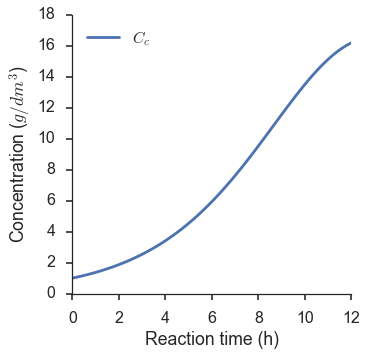

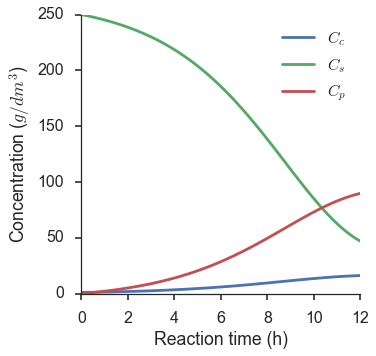

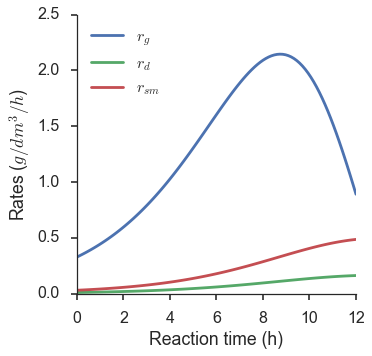

In [38]:
def dCvectordt(Cvector, t):
    """
    Differential equation for concentrations as a function of time
    
    Cvector is a vector containing three concentrations, [Cc, Cs, Cp]
    It returns a vector of three differentials [dCc/dt, dCs/dt, dCp/dt]
    """
    Cc, Cs, Cp = Cvector # unpack values from vector into three variables
    # Rate laws
    rg = mu_max * (1-Cp/Cpstar)**n * Cc * Cs / (Ks + Cs) # rate of cell growth
    rd = kd * Cc # rate of cell death
    rsm = m * Cc  # rate of substrate use for maintenance
    rp = Ypc * rg # rate of product formation
    # mass balances
    dCcdt = rg - rd
    dCsdt = (-1./Ycs) * rg - rsm
    dCpdt = rp
    return [dCcdt, dCsdt, dCpdt] # pack up values into a vector

timesteps = np.linspace(0, 12, num=100) # time steps for plots
Cvector0 = [Cc0, Cs0, Cp0] # initial values
Y_result = scipy.integrate.odeint(dCvectordt, Cvector0, timesteps) 
# extract columns by transposing matrix and splitting into three variables
Cc, Cs, Cp = Y_result.T 

plt.plot(timesteps, Cc, label='$C_c$')
plt.legend(loc="best")
plt.xlabel('Reaction time (h)')
plt.ylabel('Concentration ($g/dm^3$)')
despine()
plt.show()

plt.plot(timesteps, Cc, label='$C_c$')
plt.plot(timesteps, Cs, label='$C_s$')
plt.plot(timesteps, Cp, label='$C_p$')
plt.legend(loc="best")
plt.xlabel('Reaction time (h)')
plt.ylabel('Concentration ($g/dm^3$)')
despine()
plt.show()

# These lines are copied from above. Inside the dCvectordt function they 
# calculated a value of rg, rd, and rsm from given values of Cp, Cc and Cs.
# Now we apply them to the Arrays of many values Cp, Cc, and Cs
# to get Arrays of rg, rd, and rsm, which we can plot.
rg = mu_max * (1-Cp/Cpstar)**n * Cc * Cs / (Ks + Cs) # rate of cell growth
rd = kd * Cc # rate of cell death
rsm = m * Cc  # rate of substrate use for maintenance
    
plt.plot(timesteps, rg, label='$r_g$')
plt.plot(timesteps, rd, label='$r_d$')
plt.plot(timesteps, rsm, label='$r_{sm}$')
plt.legend(loc="best")
plt.xlabel('Reaction time (h)')
plt.ylabel('Rates ($g/dm^3/h$)')
despine()
plt.show()
